In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="rf_IKwqu7DoeLZf4Pt5VrWFaRnk8vZ2")
# project = rf.workspace("cctv analytics").project("Vehicle Counting")
# version = project.version(2)
# dataset = version.download("yolov8")

In [ ]:
!pip install ultralytics

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
image = cv2.imread("cctv analytics/Vehicle Counting/images/frame_01259.jpg.rf.frame_01821.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.



image 1/1 d:\program\PUI-2\train\images\videoplayback-3-mp4-00_02_19_35-Still013_jpg.rf.7e262fb008d8f4abb7dc85e2258858f6.jpg: 640x640 2 bicycles, 2 buss, 216.9ms
Speed: 9.8ms preprocess, 216.9ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 640)


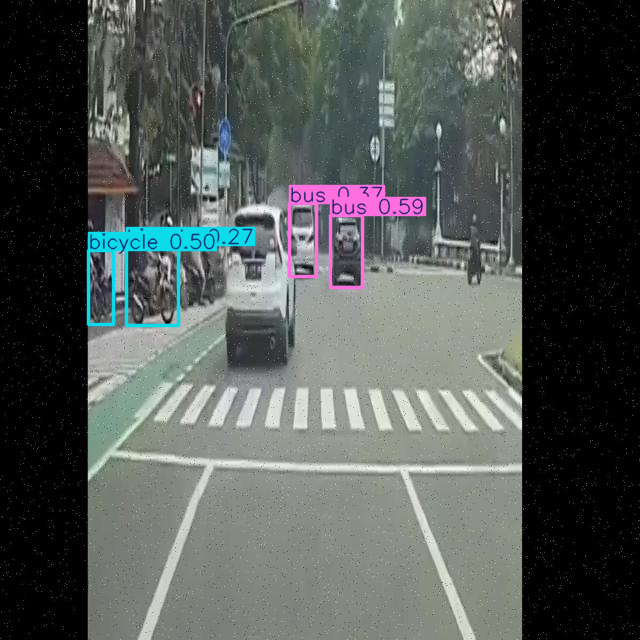

In [ ]:
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "cctv analytics/Vehicle Counting/images/frame_01259.jpg.rf.frame_01821.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(
    data=r"D:\program\Vehicle Counting\data.yaml",
    epochs=10,
    imgsz=640,
    batch=64,
    lr0=0.001,
    device='cpu'  # <-- ganti ini
)


Transferred 355/355 items from pretrained weights
Ultralytics 8.3.106  Python-3.10.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1155G7 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:\program\PUI-2\data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train5, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning D:\program\PUI-2\train\labels.cache... 458 images, 0 backgrounds, 0 corrupt: 100%|██████████| 458/458 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 121, len(boxes) = 888. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\program\PUI-2\valid\labels.cache... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 194, len(boxes) = 330. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.909      3.674      1.929         18        640: 100%|██████████| 8/8 [18:55<00:00, 141.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.34s/it]

                   all        130        330    0.00273      0.409     0.0543     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.604       2.76      1.678         19        640: 100%|██████████| 8/8 [13:35<00:00, 101.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.25s/it]

                   all        130        330    0.00377      0.489     0.0517      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.52      2.407      1.573         18        640: 100%|██████████| 8/8 [13:29<00:00, 101.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.18s/it]

                   all        130        330     0.0043      0.621      0.102     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.498      2.208      1.518         22        640: 100%|██████████| 8/8 [13:55<00:00, 104.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.40s/it]

                   all        130        330    0.00351      0.614      0.147      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G       1.47      2.073      1.518         18        640: 100%|██████████| 8/8 [14:30<00:00, 108.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.19s/it]

                   all        130        330      0.821      0.131      0.241        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.434      1.988      1.468         16        640: 100%|██████████| 8/8 [13:57<00:00, 104.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.08s/it]

                   all        130        330      0.944     0.0897      0.196     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.444        1.9      1.427         16        640: 100%|██████████| 8/8 [14:20<00:00, 107.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.35s/it]

                   all        130        330      0.759      0.184      0.307      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.415      1.801      1.399         21        640: 100%|██████████| 8/8 [15:13<00:00, 114.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.47s/it]

                   all        130        330      0.701      0.259      0.372      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.415      1.788      1.389         18        640: 100%|██████████| 8/8 [14:40<00:00, 110.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.59s/it]

                   all        130        330      0.658      0.253      0.352      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.324      1.674      1.354         20        640: 100%|██████████| 8/8 [14:27<00:00, 108.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.68s/it]

                   all        130        330      0.542      0.349        0.4      0.153



10 epochs completed in 2.545 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.106  Python-3.10.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1155G7 2.50GHz)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.84s/it]


                   all        130        330      0.543      0.349        0.4      0.154
                 Jelas        112        299      0.599      0.311      0.401      0.202
                 Pudar         21         31      0.486      0.387      0.399      0.106
Speed: 4.7ms preprocess, 142.5ms inference, 0.0ms loss, 26.4ms postprocess per image
Results saved to runs\detect\train5


In [ ]:
import cv2
import matplotlib.pyplot as plt

list_of_metrics = ["P_curve.png", "R_curve.png", "confusion_matrix.png"]

for i in list_of_metrics:
    img_path = f"D:/program/runs/detect/train5/{i}"
    print(f"Trying to load: {img_path}")
    img = cv2.imread(img_path)
    
    if img is not None:
        print(f"Success loading {i}")
        plt.figure(figsize=(16, 12))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(i)
        plt.show()
    else:
        print(f"❌ Error: Could not load image at path: {img_path}")


Trying to load: D:/program/runs/detect/train5/P_curve.png
Success loading P_curve.png


<Figure size 1600x1200 with 1 Axes>

Trying to load: D:/program/runs/detect/train5/R_curve.png
Success loading R_curve.png


<Figure size 1600x1200 with 1 Axes>

Trying to load: D:/program/runs/detect/train5/confusion_matrix.png
Success loading confusion_matrix.png


<Figure size 1600x1200 with 1 Axes>

In [ ]:
results = pd.read_csv("runs/detect/train5/results.csv")
results.head()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  1174.32         1.90868         3.67439         1.92882   
1      2  2023.08         1.60420         2.76040         1.67801   
2      3  2865.63         1.51954         2.40692         1.57332   
3      4  3734.84         1.49785         2.20768         1.51792   
4      5  4638.93         1.46955         2.07307         1.51844   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00273            0.40857           0.05433   
1               0.00377            0.48932           0.05166   
2               0.00430            0.62062           0.10229   
3               0.00351            0.61441           0.14707   
4               0.82123            0.13065           0.24149   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.02138       2.29263       4.34992       2.63141  0.000117   
1              0.02504       1.75392       4.28339       1.57692  0.000225   
2              0.03875       1.46841       4.08705       1.41461  0.000307   
3              0.06797       1.50779       3.78355       1.53462  0.000363   
4              0.10040       1.59012       3.51426       1.50638  0.000393   

     lr/pg1    lr/pg2  
0  0.000117  0.000117  
1  0.000225  0.000225  
2  0.000307  0.000307  
3  0.000363  0.000363  
4  0.000393  0.000393

In [ ]:
results.columns = results.columns.str.strip()

In [ ]:
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 10 Axes>

In [ ]:
# Loading the best performing model
Valid_model = YOLO('D:/program/runs/detect/train5/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.106  Python-3.10.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1155G7 2.50GHz)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\program\PUI-2\test\labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 265.16it/s]

val: New cache created: D:\program\PUI-2\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.59s/it]


                   all         63        110      0.763      0.612      0.689      0.446
                 Jelas         58         93      0.848      0.849      0.869      0.502
                 Pudar         17         17      0.678      0.374      0.509       0.39
Speed: 3.0ms preprocess, 123.0ms inference, 0.0ms loss, 24.4ms postprocess per image
Results saved to runs\detect\val


In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.7633832792177542
metrics/recall(B):  0.6115062379470282
metrics/mAP50(B):  0.6894102732871006
metrics/mAP50-95(B):  0.4456265126159229



image 1/1 d:\program\PUI-2\test\images\17_jpg.rf.d6db7671672e0d89bea55b002fdf00a0.jpg: 640x640 (no detections), 155.8ms
Speed: 33.1ms preprocess, 155.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


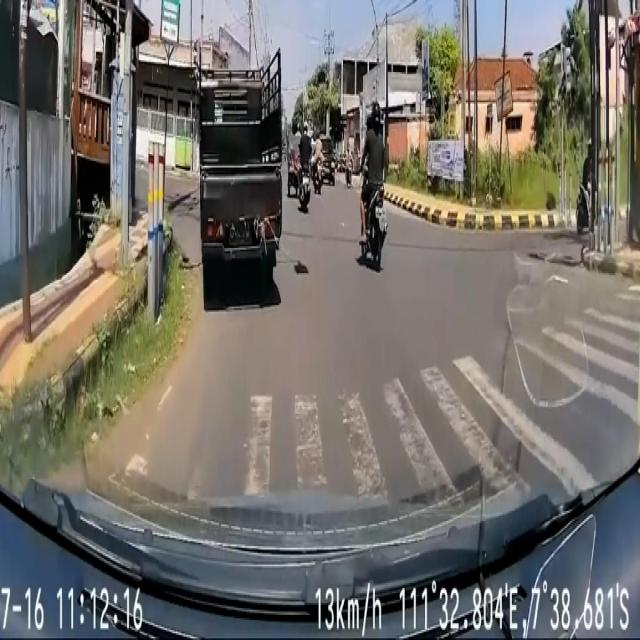


image 1/1 d:\program\PUI-2\test\images\1_jpg.rf.d478691f82ee175231f2c450edf73bd9.jpg: 640x640 1 Jelas, 103.0ms
Speed: 5.3ms preprocess, 103.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


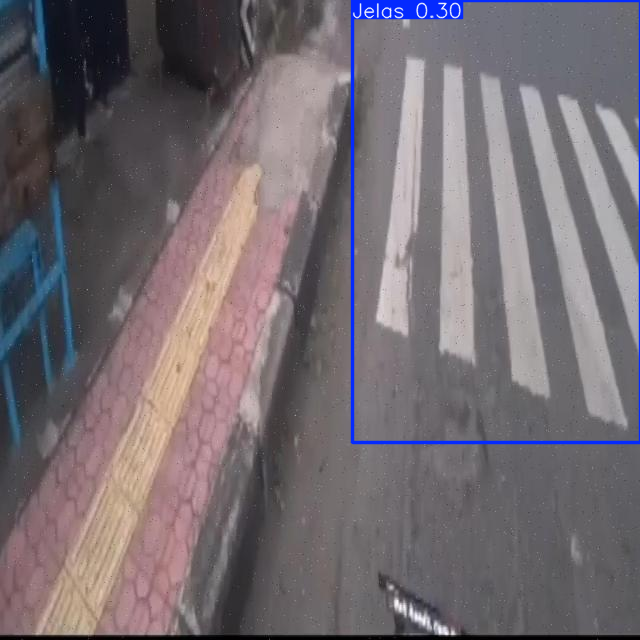


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_00_00-Still001_jpg.rf.e821f48c696582656c0a7d253096f25e.jpg: 640x640 2 Jelass, 85.4ms
Speed: 4.2ms preprocess, 85.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


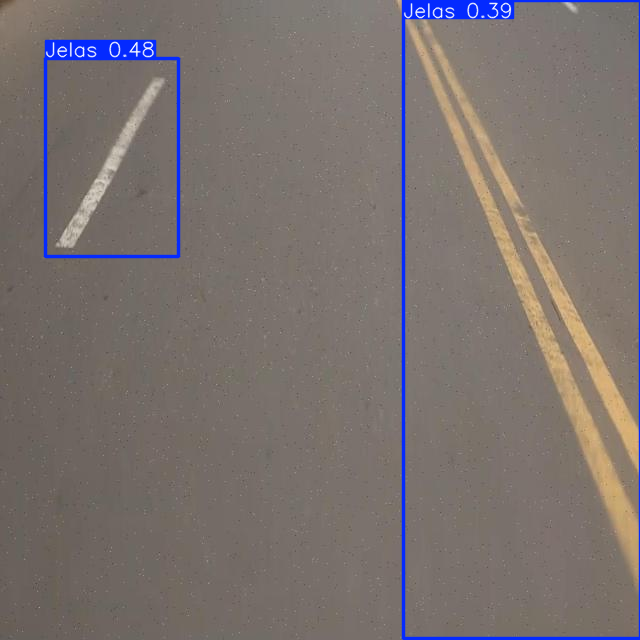


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_01_06-Still003_jpg.rf.fc11194562c7bf912dad54e42e68d8ad.jpg: 640x640 1 Jelas, 163.2ms
Speed: 3.3ms preprocess, 163.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


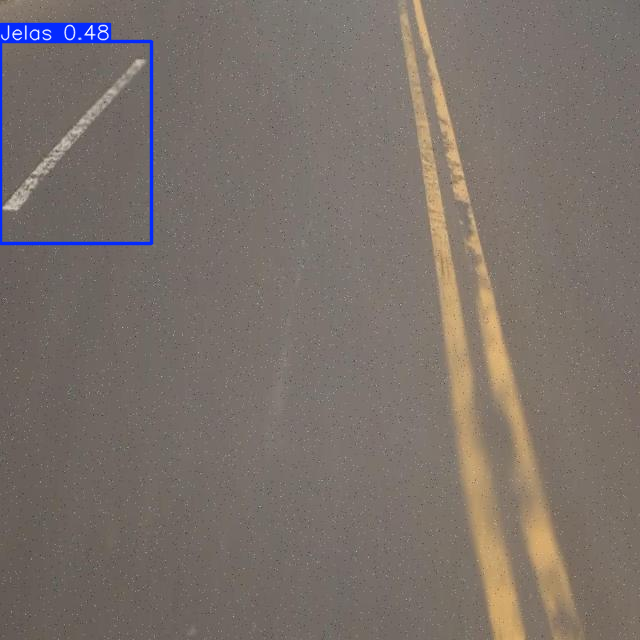


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_08_18-Still010_jpg.rf.7428b5927e89e6e0a05e1287a33ac832.jpg: 640x640 1 Jelas, 81.3ms
Speed: 2.6ms preprocess, 81.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


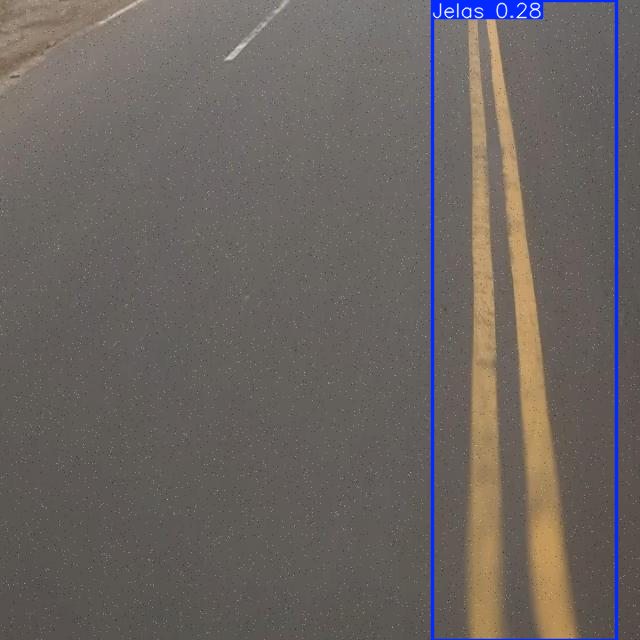


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_13_26-Still013_jpg.rf.367bf471be95c45e173485f98cef36f0.jpg: 640x640 (no detections), 94.6ms
Speed: 3.0ms preprocess, 94.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


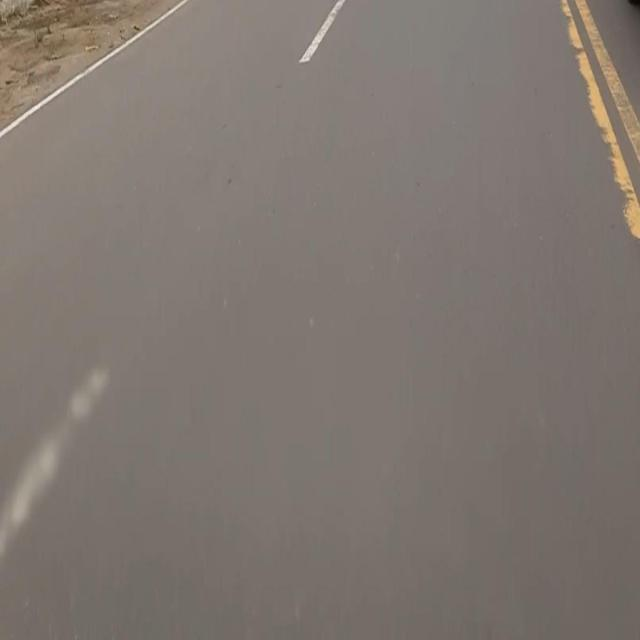


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_14_23-Still014_jpg.rf.f00b66ed1a5d72dd362fa40166be357e.jpg: 640x640 (no detections), 175.4ms
Speed: 3.0ms preprocess, 175.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


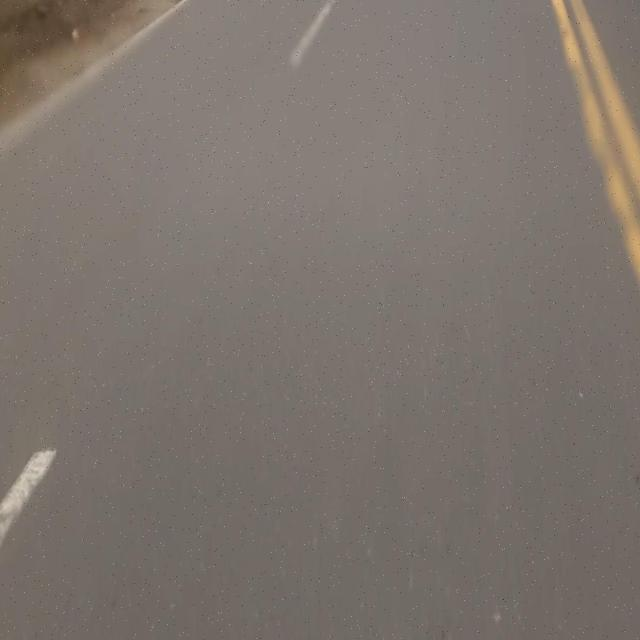


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_18_16-Still018_jpg.rf.c7099cb99ccc6b667c6225d059ef8e81.jpg: 640x640 2 Jelass, 112.0ms
Speed: 3.1ms preprocess, 112.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


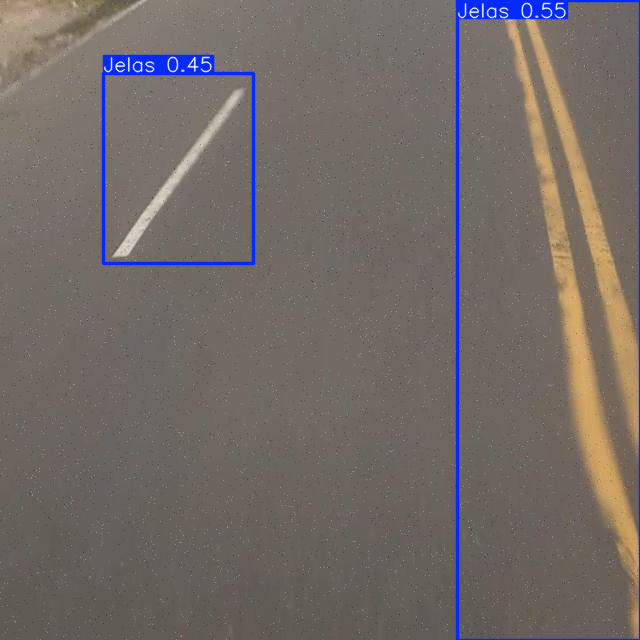


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_19_11-Still019_jpg.rf.84c020c7c894c1c00845941f69a61174.jpg: 640x640 2 Jelass, 151.4ms
Speed: 3.2ms preprocess, 151.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


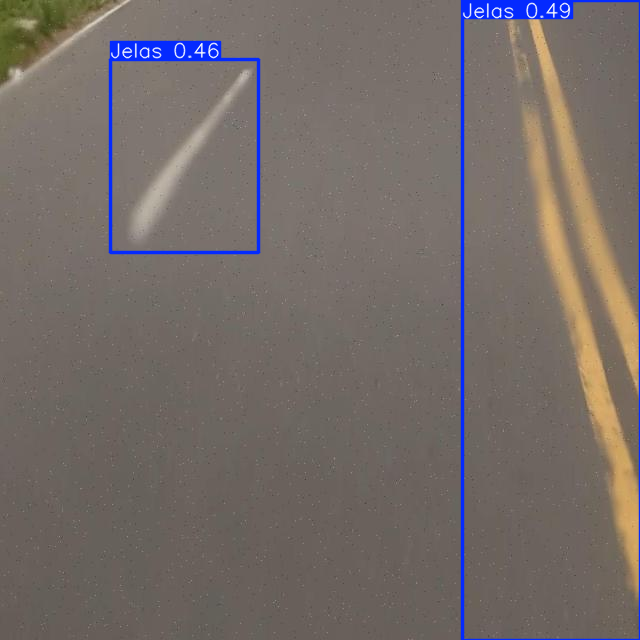


image 1/1 d:\program\PUI-2\test\images\20220903_100752-mp4-00_00_19_27-Still020_jpg.rf.ca1de579ff686a00c7df827c6c24fc07.jpg: 640x640 1 Jelas, 101.0ms
Speed: 2.5ms preprocess, 101.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


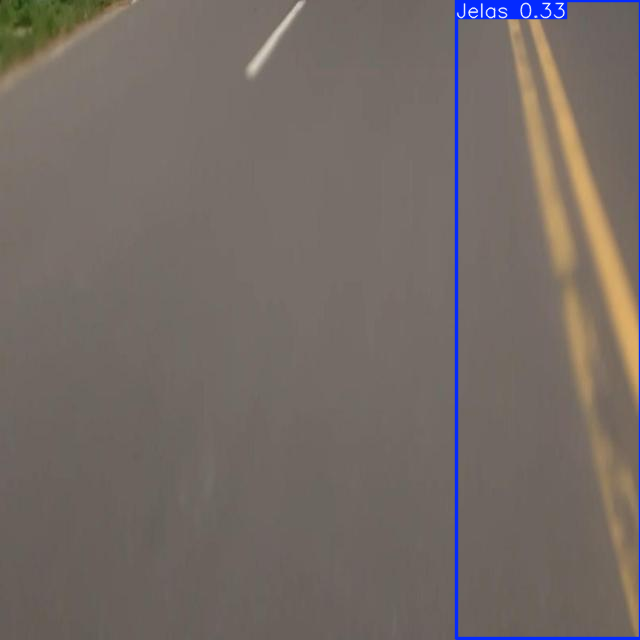

In [ ]:
images = os.listdir("PUI-2/test/images")
for i in range(10):
    image = os.path.join("PUI-2/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640))

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))